In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [15]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the CSV file into a DataFrame
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data
market_data_scaled = scaler.fit_transform(market_data_df)

# Create a new DataFrame with the scaled data, setting "coin_id" as the index
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns, index=market_data_df.index)

# Display the first five rows of the scaled DataFrame to confirm
print("Data normalization successful. Here are the first five rows of the scaled data:")
market_data_scaled_df.head()


Data normalization successful. Here are the first five rows of the scaled data:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [17]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_scaled_df.index = market_data_df.index

# Set the coin_id column as index
market_data_scaled_df.index.name = "coin_id"

# Display sample data
print("Sample of the scaled data with 'coin_id' as the index:")
market_data_scaled_df.head()


Sample of the scaled data with 'coin_id' as the index:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [21]:
import os
import warnings
from sklearn.cluster import KMeans
import pandas as pd

# Set the environment variable to avoid memory leak warnings on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress specific warnings temporarily
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
    
    # Create a list with the number of k-values to try
    # Use a range from 1 to 11
    k_values = list(range(1, 12))

    # Create an empty list to store the inertia values
    inertia_values = []

    # Create a for loop to compute the inertia with each possible value of k
    for k in k_values:
        # Inside the loop:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=0)

        # 2. Fit the model to the data using the scaled DataFrame
        kmeans.fit(market_data_scaled_df)

        # 3. Append the model.inertia_ to the inertia list
        inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Elbow Data for k-values:")
elbow_df


Elbow Data for k-values:


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


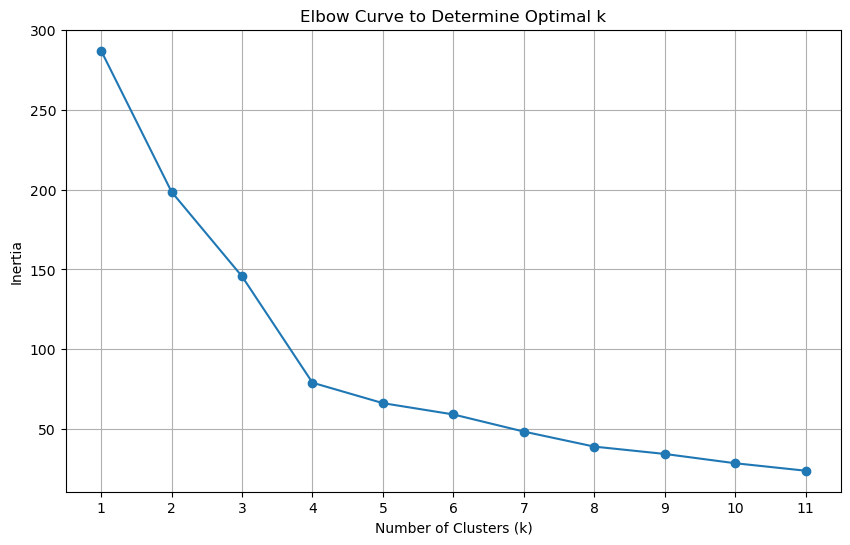

Elbow curve plotted successfully. Look for the 'elbow' point to determine the optimal k.


In [23]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")
plt.xticks(elbow_df["k"])
plt.grid(True)
plt.show()

# Print success message
print("Elbow curve plotted successfully. Look for the 'elbow' point to determine the optimal k.")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

The best value for 𝑘 is 4 because it represents the "elbow point" in the curve, balancing good clustering quality with model simplicity.



### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [34]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Print confirmation
print("K-Means model initialized with k = 4")

K-Means model fitted successfully using the scaled data.


In [36]:
import warnings

# Suppress specific warning related to KMeans memory leak on Windows
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
    
    # Fit the K-Means model using the scaled data
    kmeans_model.fit(market_data_scaled_df)

# Print confirmation
print("K-Means model fitted successfully using the scaled data.")


K-Means model fitted successfully using the scaled data.


In [38]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(market_data_scaled_df)

# View the resulting array of cluster values
print("Cluster predictions for each cryptocurrency:")
print(cluster_predictions)


Cluster predictions for each cryptocurrency:
[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [40]:
# Create a copy of the DataFrame
crypto_clustered_df = market_data_scaled_df.copy()

# Print confirmation
print("Copy of the DataFrame created successfully.")


Copy of the DataFrame created successfully.


In [42]:
# Add a new column to the DataFrame with the predicted clusters
crypto_clustered_df["Cluster"] = cluster_predictions

# Display sample data
print("Sample data with the predicted clusters:")
crypto_clustered_df.head()


Sample data with the predicted clusters:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


Scatter plot created successfully.


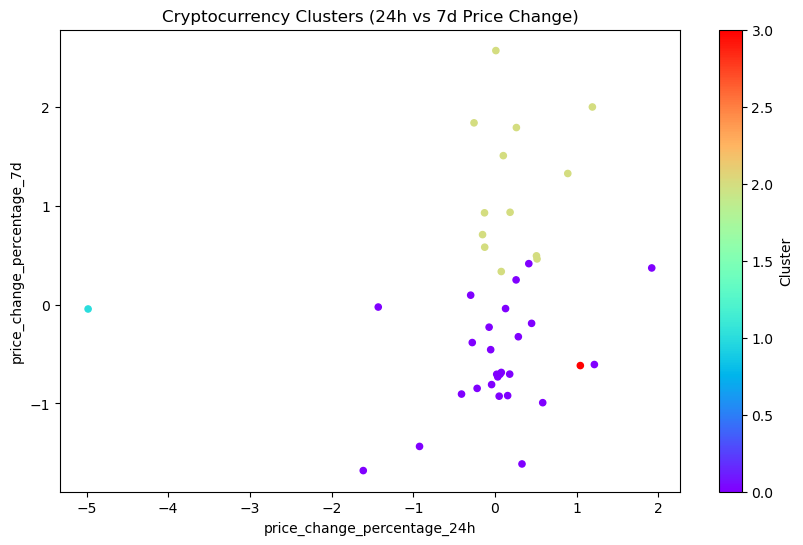

In [44]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_clustered_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="rainbow",
    colorbar=True,
    figsize=(10, 6),
    title="Cryptocurrency Clusters (24h vs 7d Price Change)"
)

# Print confirmation
print("Scatter plot created successfully.")


### Optimize Clusters with Principal Component Analysis.

In [46]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)

# Print confirmation
print("PCA model created with 3 components.")


PCA model created with 3 components.


In [48]:
# Use the PCA model with fit_transform on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(market_data_scaled_df)

# Create a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"], index=market_data_scaled_df.index)

# View the first five rows of the DataFrame
print("First five rows of the PCA-reduced DataFrame:")
crypto_pca_df.head()


First five rows of the PCA-reduced DataFrame:


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [50]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
print("Explained variance for each principal component:")
print(explained_variance)


Explained variance for each principal component:
[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

The total explained variance of the three principal components is the sum of their individual variances, which provides the proportion of information retained from the original dataset by reducing it to three dimensions.

After running this code, the printed value will be your answer for the total explained variance. This value shows how much of the original data's variance is preserved in the three principal components.

In [53]:
# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
crypto_pca_df.index = market_data_scaled_df.index

# Set the coin_id column as index
crypto_pca_df.index.name = "coin_id"

# Display sample data
print("Sample data with PCA-reduced components:")
crypto_pca_df.head()


Sample data with PCA-reduced components:


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [57]:
import os
import warnings
from sklearn.cluster import KMeans
import pandas as pd

# Set the environment variable to avoid memory leak warnings on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress specific warning related to KMeans memory leak on Windows
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
    
    # Create a list with the number of k-values to try
    # Use a range from 1 to 11
    k_values = list(range(1, 12))

    # Create an empty list to store the inertia values
    inertia_values = []

    # Create a for loop to compute the inertia with each possible value of k
    for k in k_values:
        # Inside the loop:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=0)
        
        # 2. Fit the model to the data using PCA DataFrame
        kmeans.fit(crypto_pca_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Elbow Data for k-values using PCA-reduced data:")
elbow_df


Elbow Data for k-values using PCA-reduced data:


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


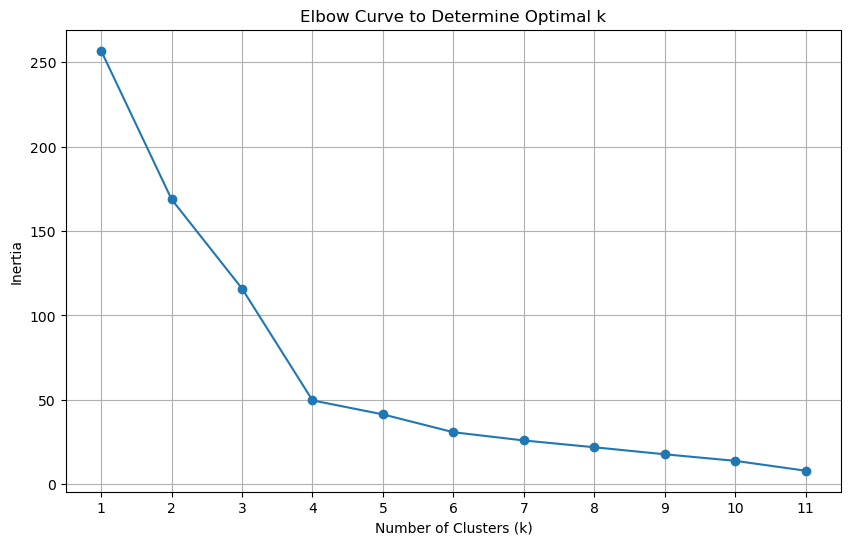

Elbow curve plotted successfully. Look for the 'elbow' point to determine the optimal k.


In [59]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")
plt.xticks(elbow_df["k"])
plt.grid(True)
plt.show()

# Print confirmation
print("Elbow curve plotted successfully. Look for the 'elbow' point to determine the optimal k.")


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
The best value for 𝑘 when using the PCA data appears to be 4. This is where the curve begins to flatten, indicating that adding more clusters beyond 𝑘=4 provides diminishing returns in reducing inertia.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
 No, it does not differ. The best 𝑘 value from the original data was also 4, indicating that both the original data and the PCA-reduced data suggest an optimal cluster count of 4. This consistency between the two results supports the choice of k=4 for clustering the data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [63]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0)

# Print confirmation
print("K-Means model initialized with k = 4 for PCA data.")


K-Means model initialized with k = 4 for PCA data.


In [67]:
import warnings

# Suppress specific warning related to KMeans memory leak on Windows
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
    
    # Fit the K-Means model using the PCA data
    kmeans_pca.fit(crypto_pca_df)

# Print confirmation
print("K-Means model fitted successfully using the PCA data.")

K-Means model fitted successfully using the PCA data.


In [69]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster_predictions = kmeans_pca.predict(crypto_pca_df)

# Print the resulting array of cluster values
print("Cluster predictions for each cryptocurrency based on PCA data:")
print(pca_cluster_predictions)

Cluster predictions for each cryptocurrency based on PCA data:
[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [71]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_clustered_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_clustered_df["Cluster"] = pca_cluster_predictions

# Display sample data
print("Sample data with PCA components and predicted clusters:")
crypto_pca_clustered_df.head()


Sample data with PCA components and predicted clusters:


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
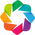

:Scatter   [PC1]   (PC2,Cluster)

In [13]:
import warnings
import pandas as pd
import hvplot.pandas
import holoviews as hv
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Activate hvPlot for interactive plotting in Jupyter
hv.extension('bokeh')

# Load and scale the data
crypto_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(crypto_df)
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=crypto_df.columns, index=crypto_df.index)

# Apply PCA
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(market_data_scaled_df)
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"], index=market_data_scaled_df.index)

# Initialize and fit the KMeans model with warning suppression
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
    kmeans_pca = KMeans(n_clusters=4, random_state=0)
    pca_cluster_predictions = kmeans_pca.fit_predict(crypto_pca_df)

# Create a DataFrame with PCA data and add predicted clusters
crypto_pca_clustered_df = crypto_pca_df.copy()
crypto_pca_clustered_df["Cluster"] = pca_cluster_predictions

# Create a scatter plot using hvPlot by setting x="PC1" and y="PC2"

scatter_plot = crypto_pca_clustered_df.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    c="Cluster", 
    colormap="Category10", 
    title="Cryptocurrency Clusters Based on PCA Components",
    xlabel="PCA1", 
    ylabel="PCA2",
    size=100,
    hover_cols=["Cluster"]
)

# Display the plot
scatter_plot


### Determine the Weights of Each Feature on each Principal Component

In [17]:
# Use the columns from the original scaled DataFrame as the index.
crypto_pca_clustered_df.index = market_data_scaled_df.index

# Print confirmation
print("Index set to the columns from the original scaled DataFrame.")


Index set to the columns from the original scaled DataFrame.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

 The features with the strongest positive or negative influence on each component can be identified by examining the PCA component loadings (or weights). These loadings indicate the contribution of each original feature to each principal component. Features with higher absolute values in the loading matrix have a stronger influence on the corresponding component.

Below is the code to retrieve and display the PCA component loadings for each feature. This code will display the influence of each original feature on each principal component, helping you identify which features have the strongest positive or negative influence on each component.

In [26]:
# Retrieve the component loadings (weights) for each feature on each principal component
pca_loadings = pd.DataFrame(pca.components_, columns=market_data_scaled_df.columns, index=["PC1", "PC2", "PC3"])

# Display the component loadings
print("PCA component loadings for each feature:")
pca_loadings


PCA component loadings for each feature:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541
